# Practical Task - Decision Trees

## Create a decision tree that can predict the survival of passengers on the Titanic

In [392]:
# Import all the required libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

# Import Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

#Splitting data into training and testing set
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score,confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report


Now, read the file and load the dataset

In [393]:
# Read the CSV file and create a dataframe
titanic_df = pd.read_csv("titanic.csv")

# Display few observations
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [394]:
# Look at the dataset column details
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [395]:
# Check for null values in the dataset
titanic_df.isnull().sum() 

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<Axes: xlabel='Age', ylabel='Density'>

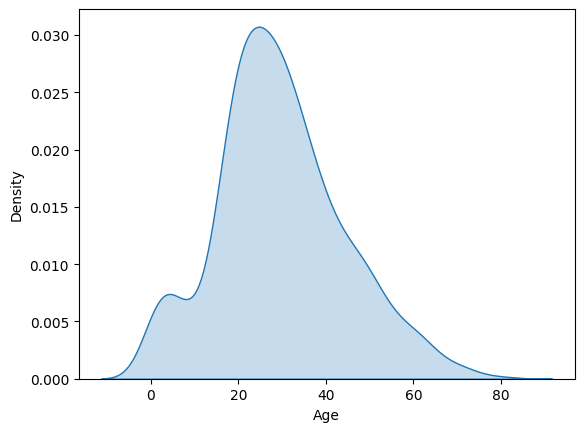

In [396]:
# Create a kdeplot for age to see the distribution of observations of Age feature 
sns.kdeplot(titanic_df["Age"], fill = True)

From the above graphs, we can see observations for Age column is a skewed distribution. As this feature  is important for target variable, we can  replace the missing values with median value of the age column.

In [397]:
# Replace null values in Age column with median value of all passenger's age 
titanic_df["Age"] = titanic_df["Age"].fillna(titanic_df["Age"].median())

Now let's look at Embarked column which denotes the port of embarkation. As this is a nominal categorical value and only very few observations are missing, we will replace with the most frequent value instead of deleting the rows of the missing value. Let's do a histplot to see the frequent value.

<Axes: xlabel='Embarked', ylabel='Count'>

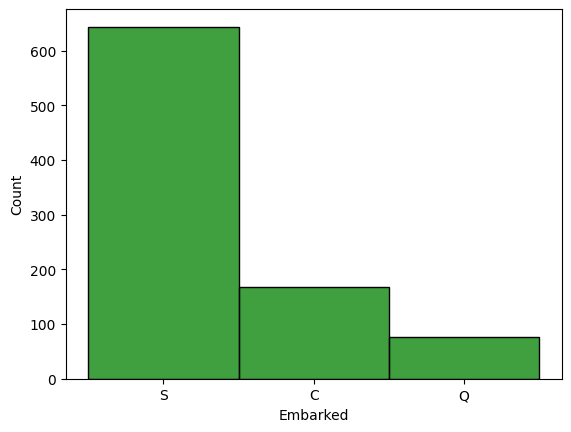

In [398]:
sns.histplot(titanic_df['Embarked'], color = 'g')

In [399]:
# Replace missing values in Embarked column with mode
titanic_df["Embarked"] = titanic_df["Embarked"].fillna(titanic_df["Embarked"].mode()[0])

Now, let's look into the target variable.

Here our target variable is 'Survived' as per the given requirement.

Now, drop the columns such as Name, Ticket, Fare & Cabin that doesnt have have any impact on the target variable

In [400]:
# Drop the columns 
titanic_df.drop(columns=["Name", "Ticket", "Fare", "Cabin"], axis=1, inplace=True)

In [401]:
# Check if all NANs have been replaced
titanic_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Embarked       0
dtype: int64

In [402]:
# Check for data types
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Embarked     891 non-null    object 
dtypes: float64(1), int64(5), object(2)
memory usage: 55.8+ KB


### One-Hot Encoding
One-hot encoding is a technique used to ensure that categorical variables are better represented in the machine. Let's take a look at the "Sex" column

In [403]:
titanic_df["Sex"].unique()

array(['male', 'female'], dtype=object)

Machine Learning classifiers don't know how to handle strings. As a result, you need to convert it into a categorical representation. There are two main ways to go about this:

Label Encoding: Assigning, for example, 0 for "male" and 1 for "female". The problem here is it intrinsically makes one category "larger than" the other category.

One-hot encoding: Assigning, for example, [1, 0] for "male" and [0, 1] for female. In this case, you have an array of size (n_categories,) and you represent a 1 in the correct index, and 0 elsewhere. In Pandas, this would show as extra columns. For example, rather than having a "Sex" column, it would be a "Sex_male" and "Sex_female" column. Then, if the person is male, it would simply show as a 1 in the "Sex_male" column and a 0 in the "Sex_female" column.

There is a nice and easy method that does this in pandas: get_dummies()

In [404]:
titanic_df = pd.get_dummies(titanic_df, prefix="Sex", columns=["Sex"], dtype = int)
titanic_df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Embarked,Sex_female,Sex_male
0,1,0,3,22.0,1,0,S,0,1
1,2,1,1,38.0,1,0,C,1,0
2,3,1,3,26.0,0,0,S,1,0
3,4,1,1,35.0,1,0,S,1,0
4,5,0,3,35.0,0,0,S,0,1


Now, we do the same to the "Embarked" column.

In [405]:
titanic_df = pd.get_dummies(titanic_df, prefix="Embarked", columns=["Embarked"], dtype = int)
titanic_df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,22.0,1,0,0,1,0,0,1
1,2,1,1,38.0,1,0,1,0,1,0,0
2,3,1,3,26.0,0,0,1,0,0,0,1
3,4,1,1,35.0,1,0,1,0,0,0,1
4,5,0,3,35.0,0,0,0,1,0,0,1


<Axes: >

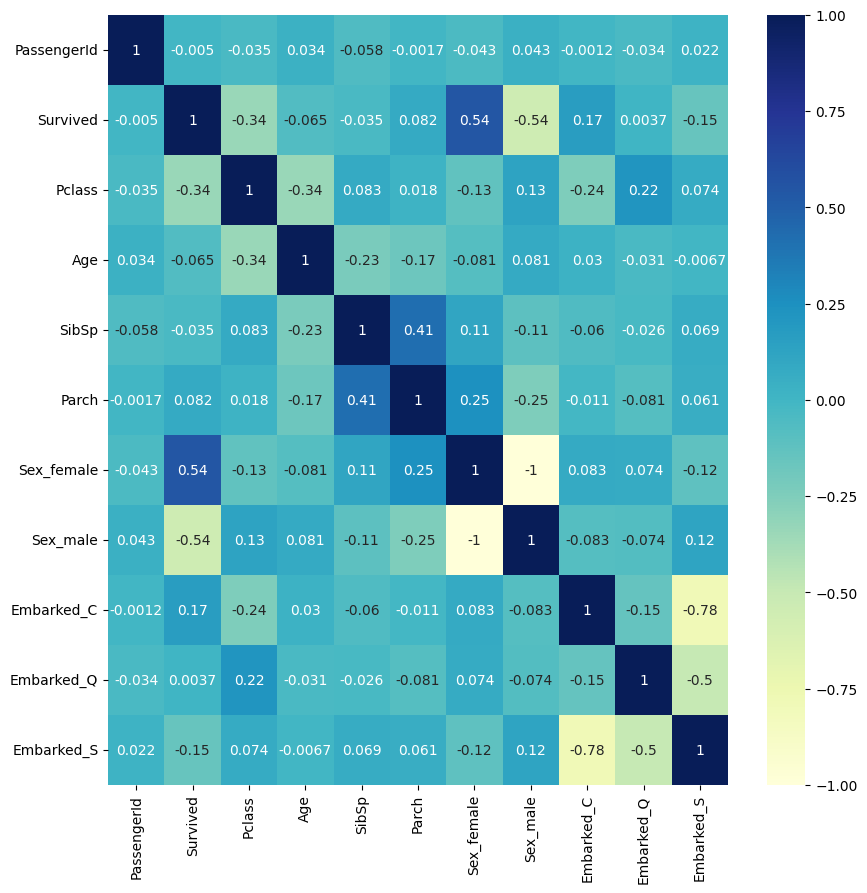

In [406]:
# Now let do a heatmap to understand the correlations
plt.figure(figsize=(10,10))
sns.heatmap(titanic_df.corr(), annot = True, cmap = 'YlGnBu')

Now, set the Features and Targets

In [407]:
# Set the X & y columns for the model
X = titanic_df.drop('Survived', axis=1).values
y = titanic_df['Survived'].values

Train and Test set split

In [408]:
# Split the original dataset into training and test sets
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y,
test_size=0.2, random_state=42)


Train and Dev set split

In [409]:
# Split the training set further into training and development sets
X_train, X_dev, y_train, y_dev = train_test_split(X_train_full,
y_train_full, test_size=0.2, random_state=42)


Import Decision Tree Model

In [410]:
# Create a classifier 
unpruned = DecisionTreeClassifier(max_depth=None, random_state=42)

# Training a model without pruning
unpruned.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

Tree Plot

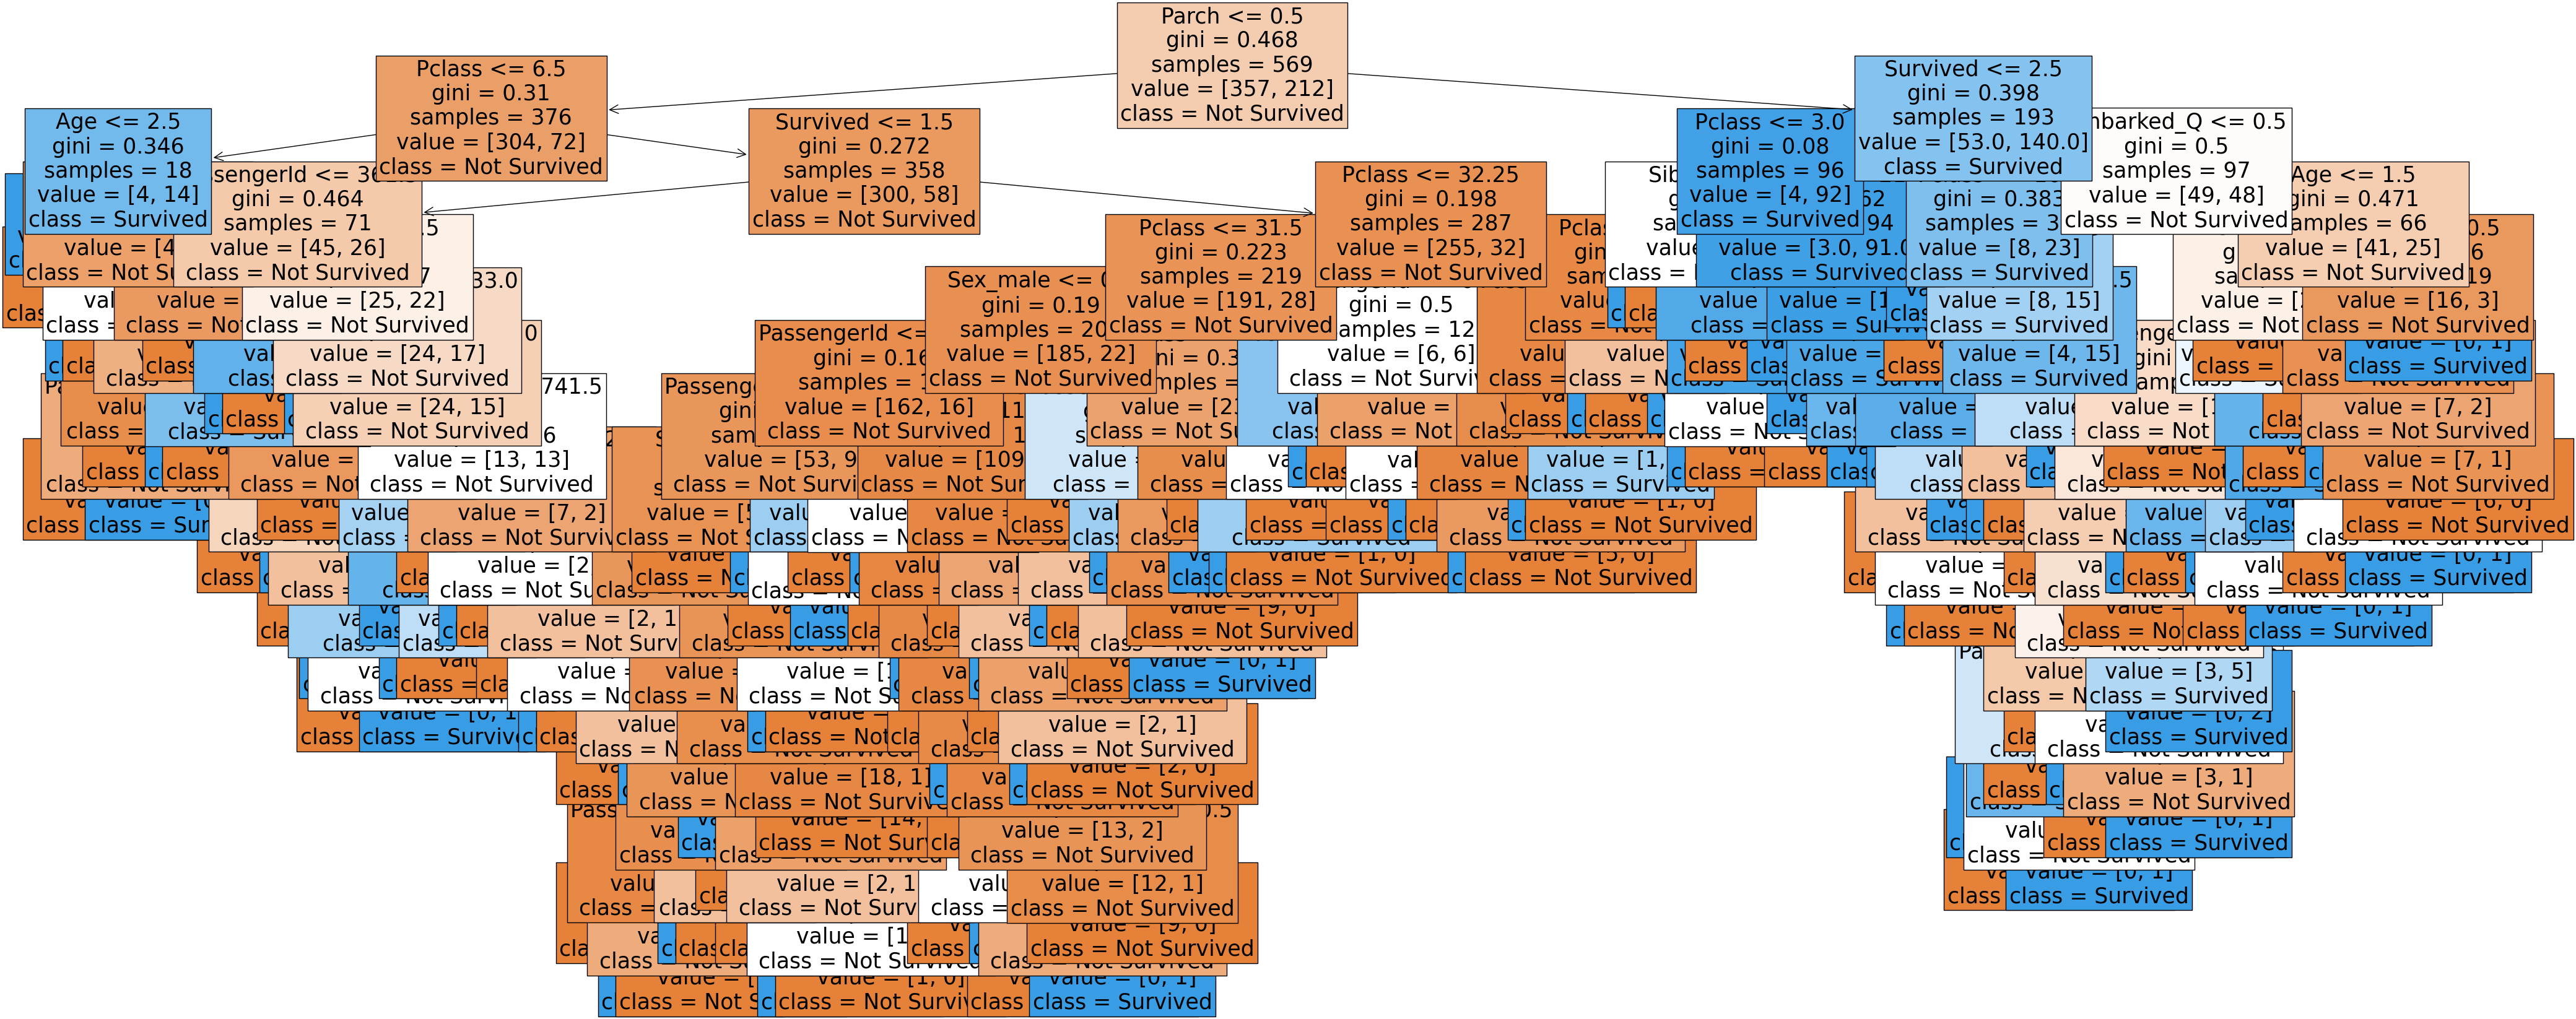

In [411]:
# Plot the decision tree
plt.figure(figsize=(50,20))
features = titanic_df.columns
classes = ['Not Survived','Survived']
tree.plot_tree(unpruned, feature_names=features,class_names=classes,filled=True,fontsize=25)
plt.show()

In [412]:
print("Performance without pruning on development set:", unpruned.score(X_dev, y_dev))
print("At depth:", unpruned.tree_.max_depth)

Performance without pruning on development set: 0.7482517482517482
At depth: 17


Compute your model’s accuracy on the development set

In [413]:
# Determine the accuracy for the development set
y_dev_pred = unpruned.predict(X_dev)

In [414]:
# Print the accuracy of the dev set
print(f'Development set accuracy : {accuracy_score(y_dev, y_dev_pred)}')

Development set accuracy : 0.7482517482517482


Now, build the model with different values of max_depth (2–10). At each step, create a plot of your tree and store the accuracies on both the training and development data.

In [415]:
# Look at effect of pruning with max depth of 10   
mdepth = 10
pruned_depths = range(2, mdepth+1)

pruned_train_scores = []
pruned_dev_scores = []
for d in pruned_depths:
  clf = DecisionTreeClassifier(max_depth=d, random_state=42)
  clf.fit(X_train, y_train)
  train_score = clf.score(X_train, y_train)
  pruned_train_scores.append(train_score)
  clf.fit(X_dev, y_dev)
  dev_score = clf.score(X_dev, y_dev)
  pruned_dev_scores.append(dev_score)


Plot a line for training accuracies and another for development accuracies in the same graph.

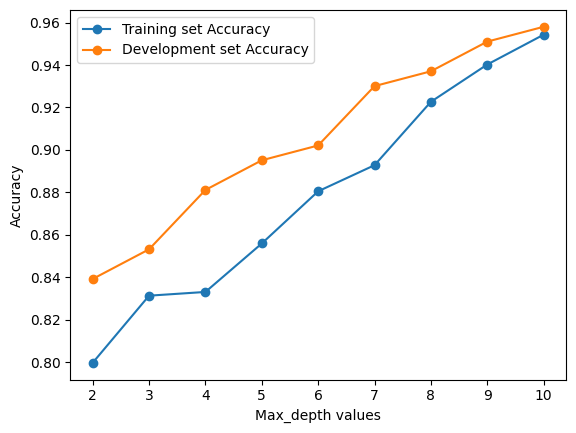

In [416]:
fig, ax = plt.subplots()
ax.plot(pruned_depths, pruned_train_scores,marker="o")
ax.plot(pruned_depths, pruned_dev_scores,marker="o")
plt.xlabel("Max_depth values")
plt.ylabel("Accuracy")
plt.legend(labels=['Training set Accuracy', 'Development set Accuracy'])
ax.xaxis.set_ticks(pruned_depths)
plt.show()


Looking at the above lineplots, as depth increases the accuracy of the model increases. At max depth value of 10, the Training and Development set accuracy lines almost merging and it reaches around 95% accuracy.

Now, report the accuracy of the model on the test data.

In [417]:
# Determine the accuracy for the test set
y_test_pred = unpruned.predict(X_test)

In [418]:
# Print the accuracy of the test set
print(f'Testing set accuracy : {accuracy_score(y_test, y_test_pred)}')

Testing set accuracy : 0.7541899441340782
